<a href="https://colab.research.google.com/github/jamesliudotcc/fast_ai/blob/main/Build_a_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [ ]:
(path/"train").ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [ ]:
threes = (path/"train"/"3").ls().sorted()
sevens = (path/"train"/"7").ls().sorted()

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)  # Image is PIL.Image
im3

In [ ]:
array(im3)[:, 8:-8] # whole height, truncate the width to fit.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0],
       [166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0],
       [253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0],
       [230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0],
       [ 15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0],
       [  0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0],
       [  0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0],
       [  0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0],
       [  0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2],
       [  0,   0,   0,  43,  98,  

In [ ]:
tensor(im3)[:, 8:-8] # whole height, truncate the width to fit.

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0],
        [166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0],
        [253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0],
        [230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0],
        [ 15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0],
        [  0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0],
        [  0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0],
        [  0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0],
        [  0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2],
        [  0,   0,  

In [ ]:
seven_tensors = [tensor(Image.open(f)) for f in sevens]
three_tensors = [tensor(Image.open(f)) for f in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

I gave the following some thought, why would it work to .float() and /255? Because of broadcasting. If you apply a method like float that works on individual numbers, or do an arithmetic operation, it broadcasts. Ok, that was tripping me up. 

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape

torch.Size([6131, 28, 28])

(<Axes: >, <Axes: >)

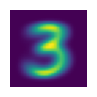

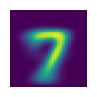

In [ ]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3),show_image(mean7)

<Axes: >

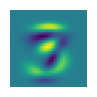

In [ ]:
show_image(mean3-mean7)

<Axes: >

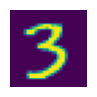

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3)

In [ ]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7) ** 2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [ ]:
valid_3_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tensor = valid_3_tensor.float()/255

valid_7_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tensor = valid_7_tensor.float()/255

valid_3_tensor.shape, valid_7_tensor.shape

(torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

There is a lot going on  here. a and b can potentially mismatch in size: There might be the mean 3 ([28,28]) and all of the validation set ([1010,28,28]), in which case the mean 3 is broadcast when doing abs(). For .mean(), the param is a tuple representing -1, the last axis, and -2, the second to last axis, which will leave a single dimension, which might be a scalar in the case of matching a 3 and the mean 3, or a 1 dimensional vector for all of the validation set.

First, check out the shapes of `a_3` and `mean3`.

Then try it out with the validation set.

In [ ]:
a_3.shape, mean3.shape

(torch.Size([28, 28]), torch.Size([28, 28]))

In [ ]:
mnist_distance(valid_3_tensor, mean3)

tensor([0.1086, 0.1112, 0.1032,  ..., 0.1173, 0.1335, 0.1153])

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tensor, valid_7_tensor]).view(-1, 28 * 28)
valid_y = tensor([1] * len(valid_3_tensor) + [0] * len(valid_7_tensor)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

In [ ]:
bias = init_params(1)

In [ ]:
weights,bias

(tensor([[-6.8837e-01],
         [-1.5757e+00],
         [ 3.0191e-01],
         [ 7.1151e-01],
         [-1.2236e-03],
         [ 2.9933e-01],
         [ 2.1663e+00],
         [-1.5142e+00],
         [-5.4962e-01],
         [-8.5587e-01],
         [ 3.9555e-01],
         [-2.0231e-01],
         [-1.2163e-01],
         [ 7.0724e-01],
         [ 9.4106e-01],
         [ 5.3808e-01],
         [ 7.5288e-01],
         [-1.2901e+00],
         [ 8.2351e-01],
         [-3.6079e-01],
         [-3.5026e-01],
         [-3.5571e-01],
         [ 1.5785e+00],
         [ 6.0427e-01],
         [-6.5207e-01],
         [ 3.7312e-01],
         [-4.6175e-01],
         [-1.8940e+00],
         [ 8.6115e-01],
         [-9.1267e-01],
         [ 5.9557e-01],
         [ 8.7254e-01],
         [-1.0066e-02],
         [-1.7711e-01],
         [-2.3958e-01],
         [ 1.6245e-01],
         [-9.9795e-01],
         [ 3.0691e-01],
         [-4.4028e-01],
         [ 1.6518e+00],
         [-3.5981e-01],
         [ 1.660

In [ ]:
(train_x[0]*weights.T).sum() + bias

tensor([-5.6291], grad_fn=<AddBackward0>)

`train_x[0]` is a row vector of 768 length and `weights` is a column vector, 768 height. Using `*` does elementwise multiply, so summing them gets us a single number. You can also do this for the same result:

In [ ]:
train_x[0]@weights + bias

tensor([-5.6291], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb): return xb@weights + bias

preds=linear1(train_x)
preds

tensor([[-5.6291],
        [-3.1962],
        [-7.7405],
        ...,
        [ 3.7247],
        [-8.7857],
        [10.1372]], grad_fn=<AddBackward0>)

Again, this works because of broadcasting. xb is the tensor of all of the images in the training set. So you do matrix multiplication by the weights, and broadcast across the training set. Also, the bias is a scalar addition that broadcasts across the training set in the obvious manner.

In [ ]:
corrects = (preds>0.0).float() == train_y

In [ ]:
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [ True],
        [False]])

In [ ]:
corrects.float().mean().item()

0.500726044178009

In [1]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()